Perkenalan

Nama : Allen

Batch: FTDS_BSD_003

Objective dan problem statement: menganalisis data dari big querry dengan data set chicago_taxi_trips dan tabel taxi_trips dengan hanya menganalisis kolom
trip_seconds untuk dideteksi adakah outlier dengan cara menghitung quantile,mean,median,modus,standard deviasi,kurtosis,dan skewness untuk output yaitu menghilangkan data outlier dan menyimpan file dalam bentuk csv dan membuat API nya

In [ ]:
#Untuk menghubungkan google collabs dengan bigquery data
from google.colab import auth
from google.cloud import bigquery
auth.authenticate_user()
print('Authenticated')

project_id_akun = "allen-project-406304" #GUNAKAN GCP PROJECT-ID KALIAN MASING-MASING
client = bigquery.Client(project=project_id_akun)

In [ ]:
#Untuk meloading semua data pada query
df = client.query('''
SELECT *
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`limit 3000

''').to_dataframe()
df

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,264842572f7c417a819abc88eb58486e92093544,ed238058c7dc5cdd8c0284e8a08127663e304f98bdbfe5...,2016-02-22 14:45:00+00:00,2016-02-22 14:45:00+00:00,274,1.3,<NA>,<NA>,<NA>,<NA>,...,0.0,5.00,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
1,097e39a4e59f97b2f8219f22adc87870dc10e4ca,f2a51ce2b77dc0e2bdc3a56c25175872e5ed2d9367cdfe...,2016-03-19 18:00:00+00:00,2016-03-19 18:00:00+00:00,840,4.6,<NA>,<NA>,<NA>,<NA>,...,1.0,14.00,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
2,7da56faefa59dbfc714897f74cb4a2da4b7e6d23,f2a51ce2b77dc0e2bdc3a56c25175872e5ed2d9367cdfe...,2016-03-19 18:15:00+00:00,2016-03-19 18:15:00+00:00,3,0.0,<NA>,<NA>,<NA>,<NA>,...,0.0,2.00,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
3,a0d37ccae04de5ed9b80741c24fea5dd729d6839,efdd945628afebed6c6d7e4d374a04b6206a967e58831c...,2016-08-19 04:15:00+00:00,2016-08-19 04:45:00+00:00,1320,15.1,<NA>,<NA>,<NA>,<NA>,...,0.0,8.01,Credit Card,303 Taxi,NaN,NaN,None,NaN,NaN,None
4,642a6816f510ee4703e1d2e71d0c38451e866818,36c2bd847a85271f4c3e2805a096468a2f4bc1282c9a36...,2016-03-23 14:15:00+00:00,2016-03-23 14:15:00+00:00,283,2.2,<NA>,<NA>,<NA>,<NA>,...,0.0,6.60,Cash,303 Taxi,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,ac8789e7b1fd82b43a1f3e587e08f680fd11d66a,9fe9b90b64c0c87afbb61dc85407a5211118cb8f176c0f...,2013-09-08 17:00:00+00:00,2013-09-08 17:15:00+00:00,1380,13.3,<NA>,<NA>,56,41,...,5.0,33.85,Cash,None,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.79409,-87.592311,POINT (-87.592310855 41.794090253)
2996,d20d6ad2193cdb56537abb3b85a6b542fd2c042c,fce5ce375d93bcded7c5006c25c5b82414269dd8e1607e...,2013-09-11 12:30:00+00:00,2013-09-11 13:15:00+00:00,2220,9.3,<NA>,<NA>,56,41,...,0.0,25.05,Cash,None,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.79409,-87.592311,POINT (-87.592310855 41.794090253)
2997,a89c28c9d046f07660e54ed0b94dca19e4fda0ea,576668e9f2eb87c779550d5aa5efd3a5ea2c837ce1ac6b...,2013-09-07 20:15:00+00:00,2013-09-07 20:45:00+00:00,1740,14.4,<NA>,<NA>,56,41,...,2.0,34.04,Cash,None,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.79409,-87.592311,POINT (-87.592310855 41.794090253)
2998,57bbd5205de987a20e686ef0230577a8daa8313f,fce5ce375d93bcded7c5006c25c5b82414269dd8e1607e...,2013-09-13 14:45:00+00:00,2013-09-13 15:30:00+00:00,2100,9.3,<NA>,<NA>,56,41,...,0.0,23.65,Cash,None,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),41.79409,-87.592311,POINT (-87.592310855 41.794090253)


In [ ]:
#Untuk melihat semua kolom pada data
df.columns

Index(['unique_key', 'taxi_id', 'trip_start_timestamp', 'trip_end_timestamp',
       'trip_seconds', 'trip_miles', 'pickup_census_tract',
       'dropoff_census_tract', 'pickup_community_area',
       'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras',
       'trip_total', 'payment_type', 'company', 'pickup_latitude',
       'pickup_longitude', 'pickup_location', 'dropoff_latitude',
       'dropoff_longitude', 'dropoff_location'],
      dtype='object')

In [ ]:
#Untuk melihat ada berapa baris dan kolom yang ada pada data
df.shape

(3000, 23)

In [ ]:
#Untuk meilhat semua tipe data dan missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   unique_key              3000 non-null   object             
 1   taxi_id                 3000 non-null   object             
 2   trip_start_timestamp    3000 non-null   datetime64[ns, UTC]
 3   trip_end_timestamp      3000 non-null   datetime64[ns, UTC]
 4   trip_seconds            3000 non-null   Int64              
 5   trip_miles              3000 non-null   float64            
 6   pickup_census_tract     333 non-null    Int64              
 7   dropoff_census_tract    109 non-null    Int64              
 8   pickup_community_area   1722 non-null   Int64              
 9   dropoff_community_area  453 non-null    Int64              
 10  fare                    3000 non-null   float64            
 11  tips                    3000 non-null   flo

Dikarenakan kita hanya disuruh satu kolom saja yaitu kolom trip_seconds maka kita akan berfokus hanya pada kolom tersebut

In [ ]:
#Beberapa tools yang mungkin bisa digunakan harus dipastikan terimport seperti dibawah ini
import time
import csv
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#untuk mengambil hanya data pada kolom trip_seconds
df = client.query('''
SELECT trip_seconds
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`limit 3000

''').to_dataframe()
df

,trip_seconds
0,274
1,840
2,3
3,1320
4,283
...,...
2995,1380
2996,2220
2997,1740
2998,2100


## Analisis Anomali

Kamu diminta untuk menganalisis data penyewaan rumah. Namun, kamu sadar bahwa sepertinya ada data anomali yang harus dikeluarkan.

Untuk mengetahui adanya anomali, kamu bisa menggunakan metode extreme value analysis. Untuk melakukan pengecekan anomali/outlier, lakukan langkah-langkah di bawah ini:

1. Lakukan perhitungan central tendency (mean, median, modus) terhadap data sebelum dideteksi adanya anomali.

2. Cek skewness data untuk mengetahui apakah data terdistribusi normal atau tidak.

3. Lakukan pengolahan data dengan menggunakan extreme value analysis.

4. Buat variabel baru yang menyimpan data yang sudah dibuang data anomalinya.
5. Simpan data yang sudah dibuang anomalinya ke file csv dengan nama file <nama-student>.csv.

1. Menghitung mean,median,dan modus.

In [ ]:
#Untuk menghitung mean median dan modus hanya pada kolom trip_seconds
df = client.query('''
SELECT trip_seconds
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`limit 3000

''').to_dataframe()
df
print('Mean trip_seconds:',df['trip_seconds'].mean())
print('Median trip_seconds:',df['trip_seconds'].median())
print('Modus trip_seconds:',df['trip_seconds'].mode().values[0])



Mean trip_seconds: 1148.1666666666667
Median trip_seconds: 960.0
Modus trip_seconds: 1


In [ ]:
#Untuk menghitung kuantile yang kaitannya akan digunakan untuk menghilangkan missing value
q1 = df['trip_seconds'].quantile(0.25)
q2 = df['trip_seconds'].quantile(0.5)
q3 = df['trip_seconds'].quantile(0.75)

iqr = q3 - q1
print('Q1:',q1)
print('Q2:',q2)
print('Q3:',q3)
print('Interquartile Range (IQR):',iqr)

Q1: 436.0
Q2: 960.0
Q3: 1620.0
Interquartile Range (IQR): 1184.0


2. Menghitung skewness dan kurtosis data untuk mengetahui apakah data terdistribusi normal atau tidak.



In [ ]:
col= ['trip_seconds']

In [ ]:
# Untuk menghitung Skewness,kurtosis, dan Standard Deviation
df = client.query('''
SELECT trip_seconds
FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`limit 3000

''').to_dataframe()
df
print('Skewness:',df['trip_seconds'].skew())
print('Kurtosis:',df['trip_seconds'].kurtosis())
print('Standard Deviation:',df['trip_seconds'].std())


Skewness: 12.10183789772813
Kurtosis: 283.8004711388201
Standard Deviation: 1303.5950785929908


Karena data skew yang kita dapat dari tabel trip_seconds adalah 12.10183789772813 dapat dikategorikan bahwa data pada kolom trip_seconds memiliki distribusi data Highly Skewed untuk kurtosisnya adalah tipe leptocurtic artinya adaalah memiliki ekor yang lebih berat dibandingkan distribusi normal tetapi itu membuat data mungkin tidak normal sehingga mari kita cek sekali lagi mean dan median nya pasti akan cenderung memiliki distribusi yang normal

In [ ]:
print('Mean trip_seconds:',df['trip_seconds'].mean())
print('Median trip_seconds:',df['trip_seconds'].median())

Mean trip_seconds: 1148.1666666666667
Median trip_seconds: 960.0


3. Lakukan pengolahan data dengan menggunakan extreme value analysis untuk mmembuktikan apakah data memiliki distribusi yang normal dengan tes kedua ini mari kita lihat
4. membersihkan outlier

In [ ]:
df.trip_seconds.value_counts()
df.head()

,trip_seconds
0,274
1,840
2,3
3,1320
4,283


<Axes: >

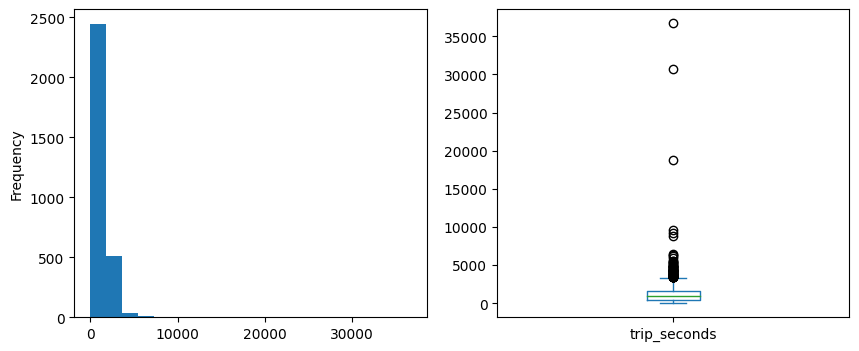

In [ ]:
# Untuk menampilkan plot menggunakan analisis distribusi extream values untuk melihat atau mendeteksi outliers
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

df['trip_seconds'].plot(kind='hist',bins=20,ax=ax[0])
df['trip_seconds'].plot(kind='box',ax=ax[1])

outliers masih terlihat

In [ ]:
#Untuk menghitung up and low boundary
avg = (df['trip_seconds'].mean())
std = (df['trip_seconds'].std())

up_bound = avg + 3*std
low_bound = avg - 3*std

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 5058.95
Lower Boundary: -2762.62


In [ ]:
#Untuk menghitung presentasi outlier
outlier = df['trip_seconds'][(df['trip_seconds']<low_bound) | (df['trip_seconds']>up_bound)]
no_outlier = df['trip_seconds'][(df['trip_seconds']>=low_bound) & (df['trip_seconds']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["trip_seconds"]):.2f}%%')

Percentage of outliers: 0.53%%


Normal Distribution: Z-Score

<Axes: >

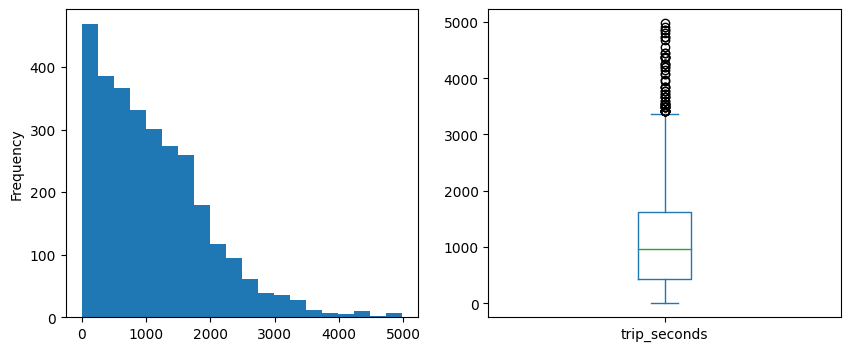

In [ ]:
#Menggunakan analisis Normal Distribution: Z-Score
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

karena outliers masih terdeteksi maka kita harus menggunakan satu cara lagi seperti dibawah ini

Skew Distribution: Tukey's Rule

In [ ]:
#untuk menghitung upbound dan lowbound
q1 = df['trip_seconds'].quantile(0.25)
q3 = df['trip_seconds'].quantile(0.75)
iqr = q3-q1

up_bound = q3 + 1.5*iqr
low_bound = q1 - 1.5*iqr

print(f'Upper Boundary: {up_bound:.2f}' )
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 3396.00
Lower Boundary: -1340.00


In [ ]:
#untuk menghitung presentasi outlier
outlier = df['trip_seconds'][(df['trip_seconds']<low_bound) | (df['trip_seconds']>up_bound)]
no_outlier = df['trip_seconds'][(df['trip_seconds']>=low_bound) & (df['trip_seconds']<=up_bound)]

print(f'Percentage of outliers: {len(outlier)*100/len(df["trip_seconds"]):.2f}%%')

Percentage of outliers: 2.40%%


<Axes: >

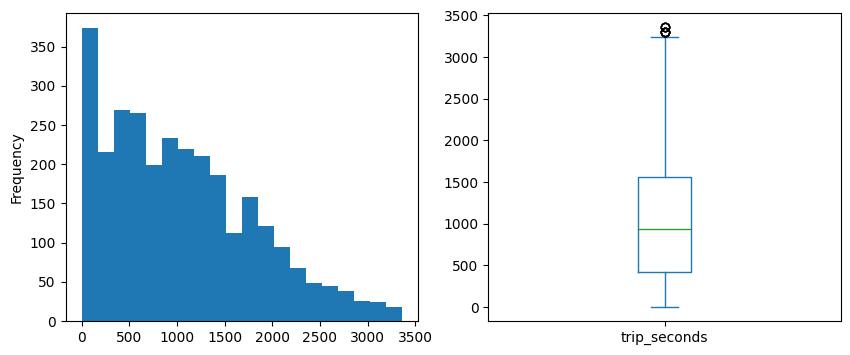

In [ ]:
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

no_outlier.plot(kind='hist',bins=20,ax=ax[0])
no_outlier.plot(kind='box',ax=ax[1])

In [ ]:
df.to_csv('Data_Outlier_Cleaning.csv', index=False)
print('Data Saved')

Data Saved


1. Berapa rata-rata, median, dan modus dari data tersebut sebelum dihilangkan outliernya? Bagaimana kecerendungan pemusatan datanya? jelaskan jawabanmu!
2. Sebelum melakukan extreme value analysis, kamu harus melakukan pengecekan skewness dari distribusi datanya. Apakah datanya skew atau normal? jelaskan jawabanmu!
3. Ada dua teknik untuk melakukan extreme value analysis, teknik yang mana yang kamu pakai? berikan alasanmu berdasarkan data!

1.
2. menurut data yang saya analisis bahwa distribusi data pada kolom trip_seconds memiliki Highly Skewed dan untuk kurtosisnya adalah tipe leptocurtic artinya adaalah memiliki ekor yang lebih berat dibandingkan distribusi normal tetapi itu membuat data mungkin tidak normal
3. saya memakai kedua teknik yaitu Normal Distribution: Z-Score dan Skew Distribution: Tukey's Rule menurut saya cara kedua yaitu Skew Distribution: Tukey's Rule lebih efektif bekerja menghilangkan outlier pada data yang sedang saya analisis walaupun hasil akhirnya saya gagal dan masih menyisakan sedikit outlier